In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test.csv
Saving Titanic_train.csv to Titanic_train.csv


In [9]:
train_data =pd.read_csv('Titanic_test.csv')
train_data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
test_data=pd.read_csv('Titanic_train.csv')
test_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

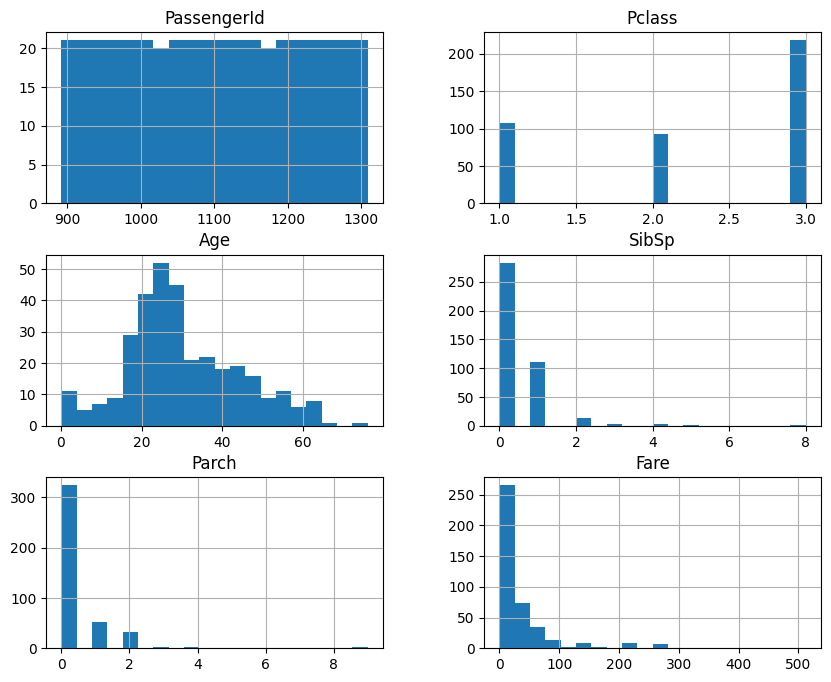

In [11]:
train_data.hist(bins=20, figsize=(10, 8))

In [15]:
# Verify if the 'Survived' column exists
print(train_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
print(train_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [22]:
train_data.columns = train_data.columns.str.strip()  # Remove any leading/trailing spaces
train_data.columns = train_data.columns.str.lower()  # Convert all column names to lowercase for consistency


<Axes: xlabel='Age', ylabel='Survived'>

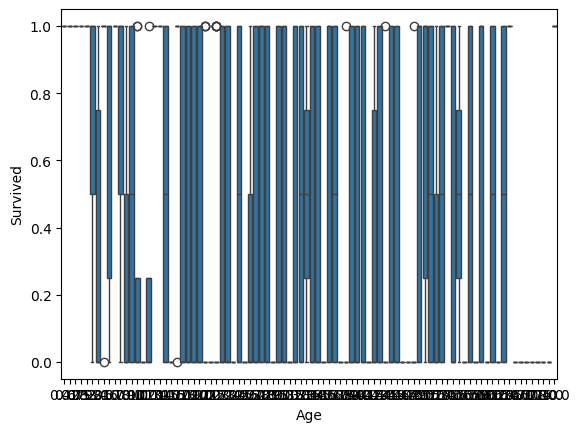

In [27]:
sns.boxplot(x='Age', y='Survived',data=test_data)


In [28]:
# Select only numeric columns for correlation
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])


In [29]:
# Correlation heatmap to observe feature relationships
corr = numeric_data.corr()


<Axes: >

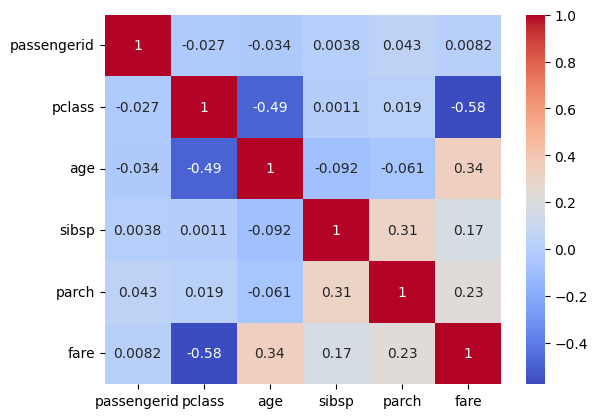

In [31]:
# Plot the heatmap with annotations
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [33]:
# Since 'Embarked' is already one-hot encoded, no need to fill missing values in 'Embarked'
# Check if 'Embarked' exists before attempting to fill missing values
if 'Embarked' in train_data.columns:
    train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
else:
    print("Column 'Embarked' not found in train_data (likely already one-hot encoded)")


Column 'Embarked' not found in train_data (likely already one-hot encoded)


In [34]:
# Encode categorical variables like 'Sex' and 'Embarked' in train data
# This step is redundant now since 'Sex' and 'Embarked' are already encoded
# train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Handle missing values in the test dataset
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())


In [35]:
# Add missing columns from train_data to test_data (except 'Survived')
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    if col != 'Survived':  # Ignore 'Survived' as it's not in test_data
        test_data[col] = 0


In [41]:
# Align test_data columns with train_data (excluding 'Survived')
# Align test_data columns with train_data (excluding 'Survived')
test_data = test_data[[col for col in train_data.columns if col != 'Survived']]




In [61]:
# ## Model Building

# In[28]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [83]:
# ## Model Evaluation

# In[30]:


import warnings
warnings.filterwarnings('ignore')
# Import metrics to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [86]:
import pandas as pd

# Loading the dataset (assuming the file is named 'Titanic_test.csv')
# train_data = pd.read_csv('Titanic_test.csv') # For demonstration, we will skip this line.

# Display feature names and data types
data_info = train_data.info()

# Display summary statistics for numeric columns
summary_statistics = train_data.describe()

# Display summary statistics for categorical columns
categorical_summary = train_data.describe(include=['O'])

data_info, summary_statistics, categorical_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   pclass       418 non-null    int64  
 2   name         418 non-null    object 
 3   age          332 non-null    float64
 4   sibsp        418 non-null    int64  
 5   parch        418 non-null    int64  
 6   ticket       418 non-null    object 
 7   fare         417 non-null    float64
 8   cabin        91 non-null     object 
 9   sex_male     418 non-null    bool   
 10  embarked_Q   418 non-null    bool   
 11  embarked_S   418 non-null    bool   
dtypes: bool(3), float64(2), int64(4), object(3)
memory usage: 30.7+ KB


(None,
        passengerid      pclass         age       sibsp       parch        fare
 count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
 mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
 std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
 min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
 25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
 50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
 75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
 max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200,
                     name    ticket            cabin
 count                418       418               91
 unique               418       363               76
 top     Kelly, Mr. James  PC 17608  B57 B59 B63 B66
 freq                   1         5                3)

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the Titanic dataset (replace 'Titanic_test.csv' with the correct file path)
train_data = pd.read_csv('Titanic_test.csv')


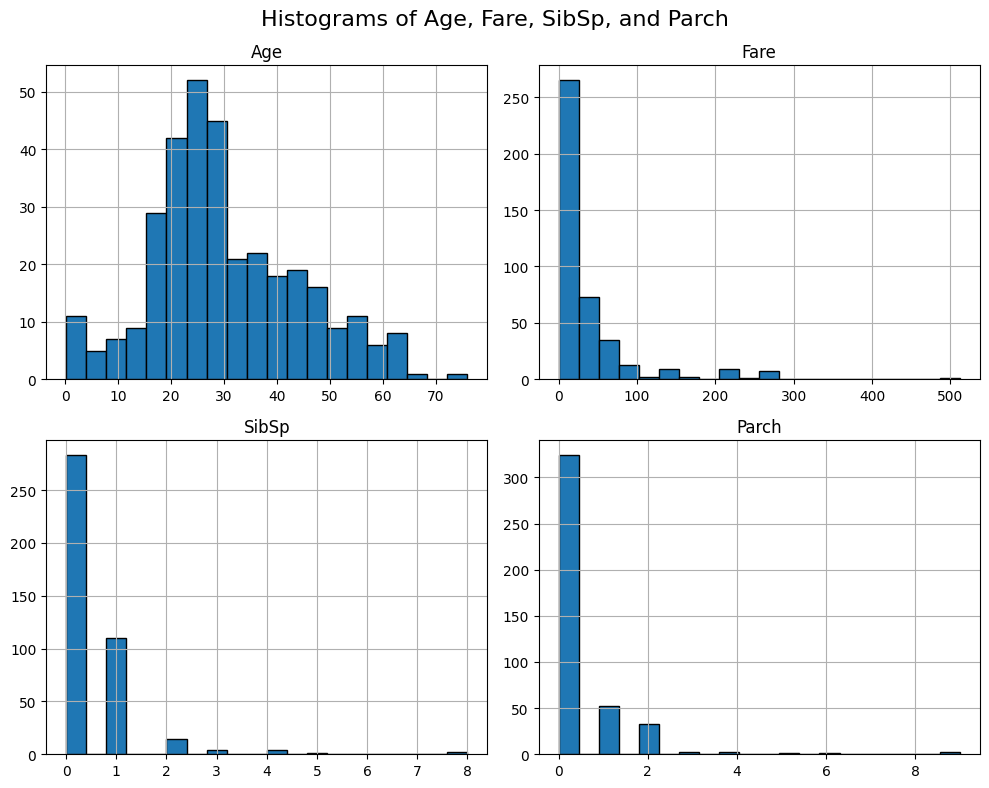

In [88]:
# Plot histograms for numerical columns
train_data[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=20, figsize=(10, 8), layout=(2, 2), edgecolor='black')
plt.suptitle('Histograms of Age, Fare, SibSp, and Parch', fontsize=16)
plt.tight_layout()
plt.show()


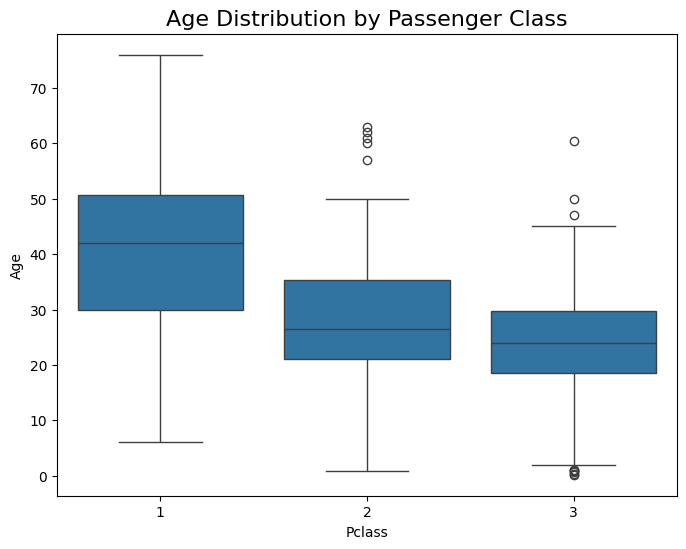

In [91]:
# Boxplot for Age by Passenger Class (Pclass)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title('Age Distribution by Passenger Class', fontsize=16)
plt.show()



In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the 'Survived' column exists
if 'Survived' in train_data.columns:
    # Pair plot of selected numeric features including 'Survived'
    sns.pairplot(train_data[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived', diag_kind='kde', palette='coolwarm')
    plt.suptitle('Pair Plot of Age, Fare, SibSp, Parch with Survival', fontsize=16)
    plt.show()
else:
    print("The 'Survived' column is not present in the dataset.")


The 'Survived' column is not present in the dataset.


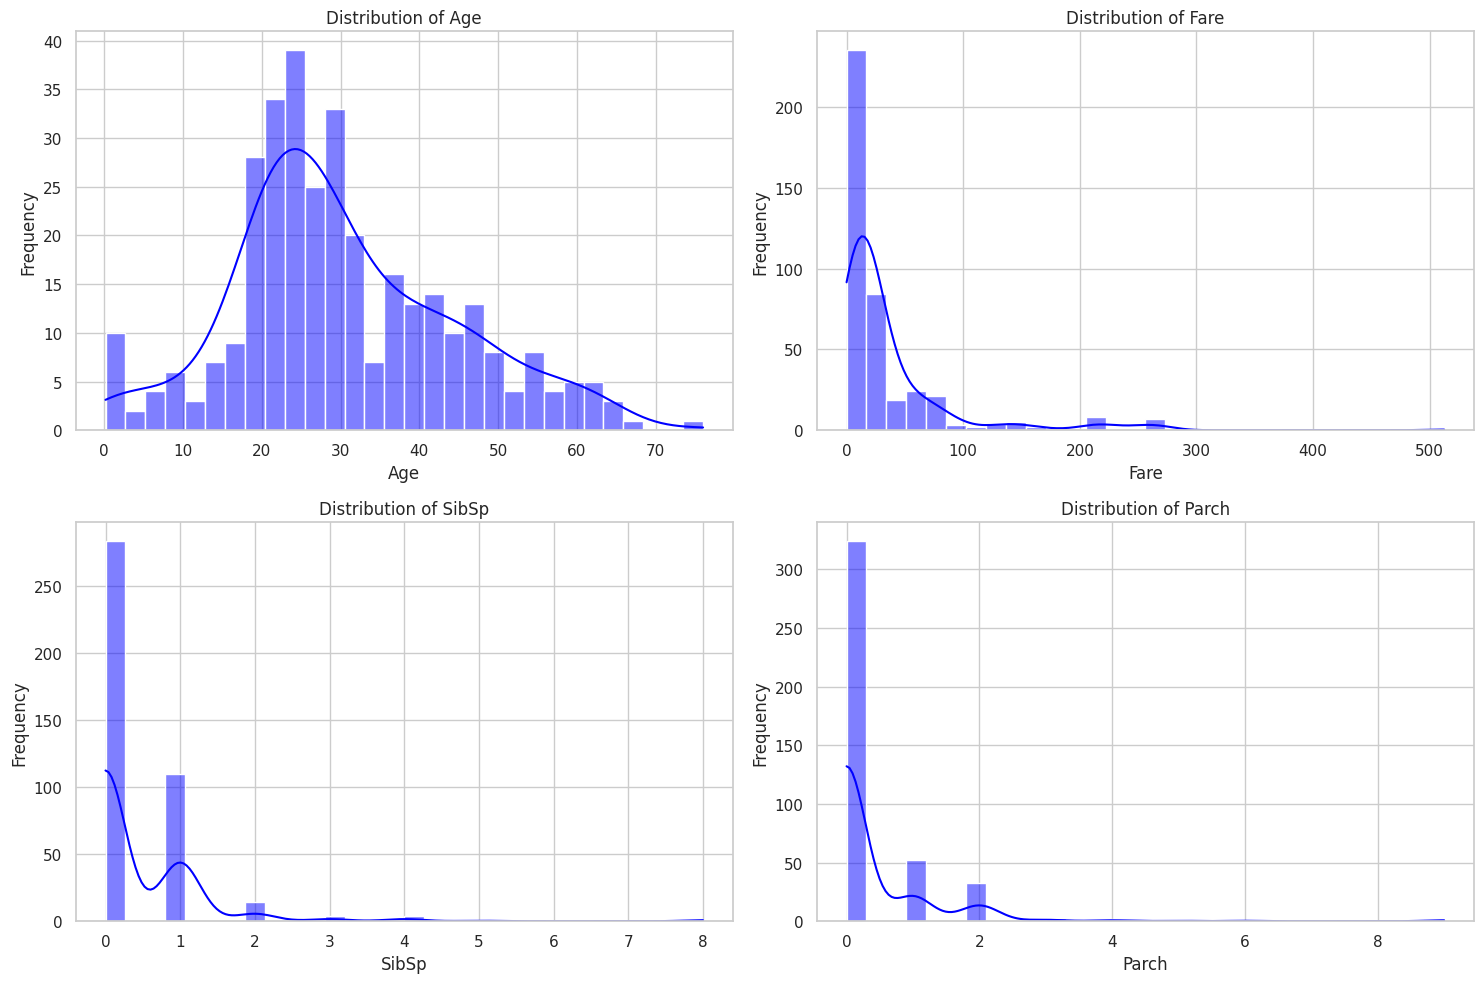

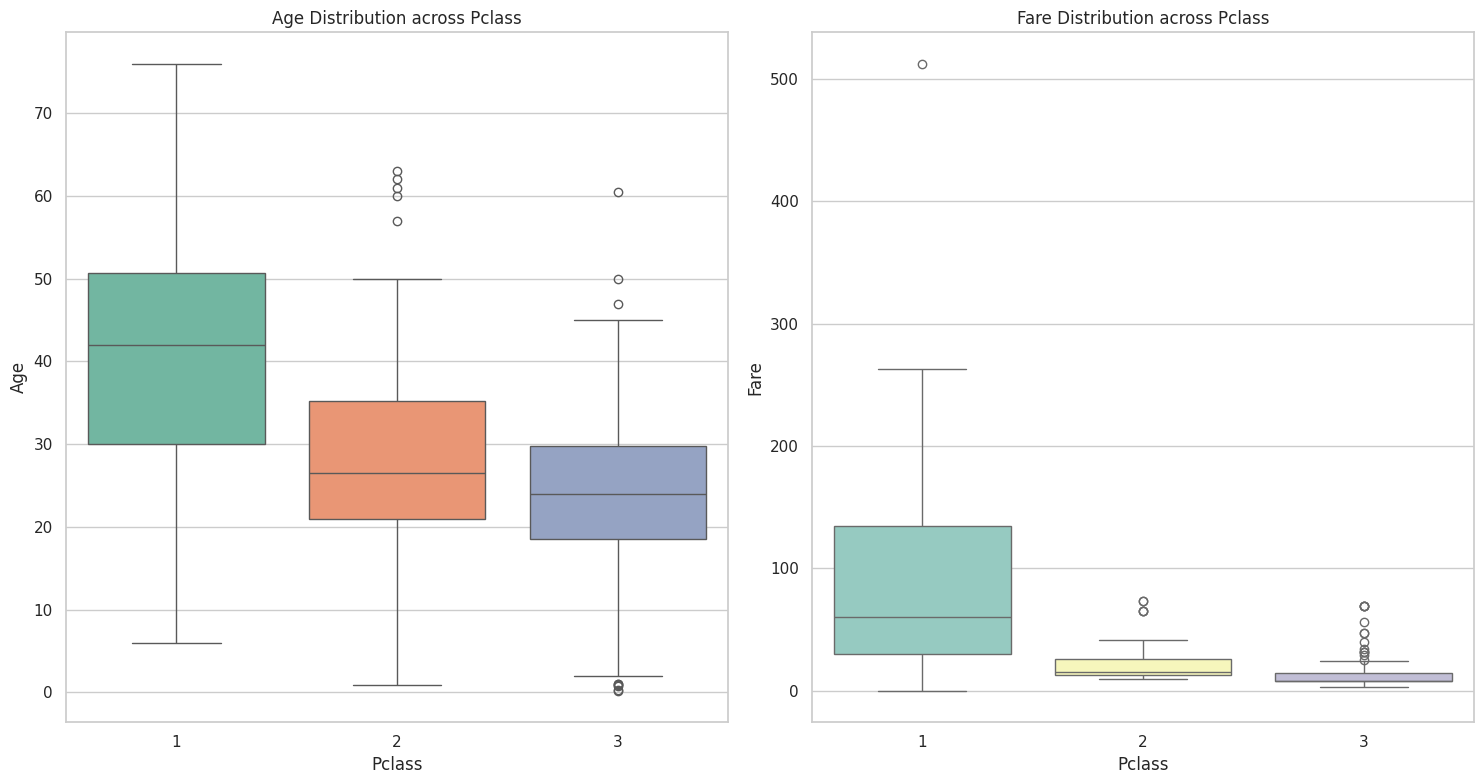

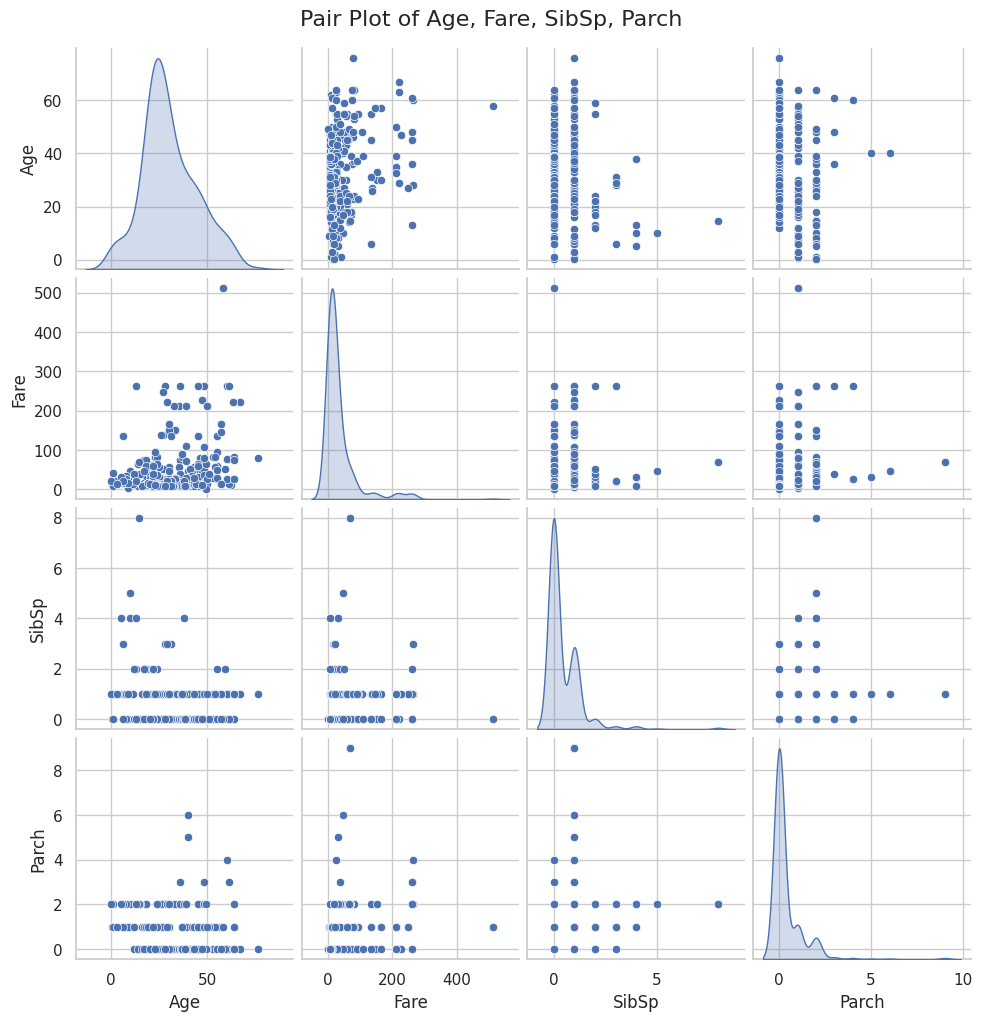

The 'Survived' column is not present in the dataset.


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
train_data = pd.read_csv('Titanic_test.csv')

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# 1. Histograms for numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_data[feature].dropna(), bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Box Plots to visualize outliers and spread across different categories
plt.figure(figsize=(15, 8))

# Box plot for Age across Pclass
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=train_data, palette='Set2')
plt.title('Age Distribution across Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')

# Box plot for Fare across Pclass
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=train_data, palette='Set3')
plt.title('Fare Distribution across Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

# 3. Pair Plot to explore relationships between selected features
sns.pairplot(train_data[['Age', 'Fare', 'SibSp', 'Parch']], diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Age, Fare, SibSp, Parch', fontsize=16, y=1.02)
plt.show()

# 4. Pair Plot with Survival Information if the 'Survived' column exists
if 'Survived' in train_data.columns:
    sns.pairplot(train_data[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived', diag_kind='kde', palette='coolwarm')
    plt.suptitle('Pair Plot of Age, Fare, SibSp, Parch with Survival', fontsize=16, y=1.02)
    plt.show()
else:
    print("The 'Survived' column is not present in the dataset.")


Correlation Matrix:
             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.026751 -0.034102  0.003818  0.043080  0.008211
Pclass         -0.026751  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age            -0.034102 -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp           0.003818  0.001087 -0.091587  1.000000  0.306895  0.171539
Parch           0.043080  0.018721 -0.061249  0.306895  1.000000  0.230046
Fare            0.008211 -0.577147  0.337932  0.171539  0.230046  1.000000


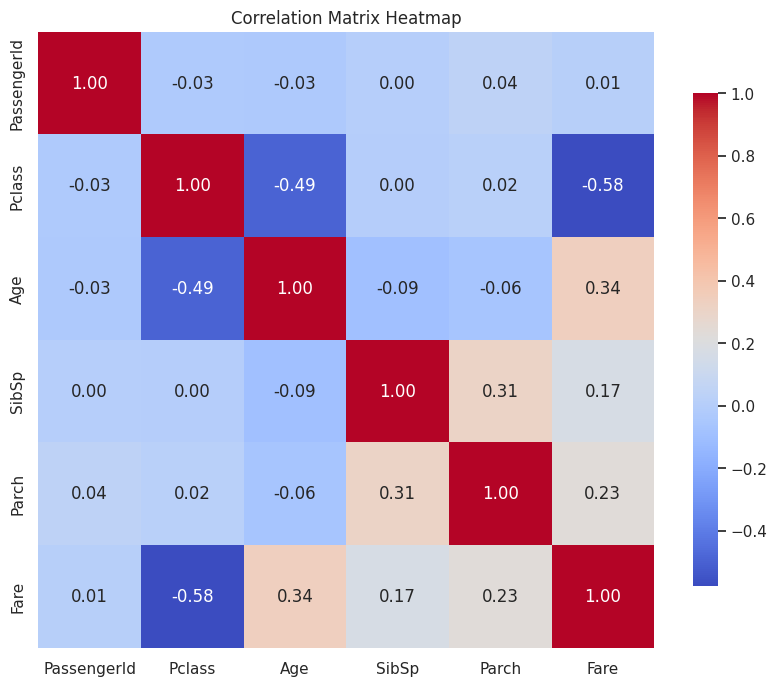

ValueError: Could not interpret value `Survived` for `hue`. An entry with this name does not appear in `data`.

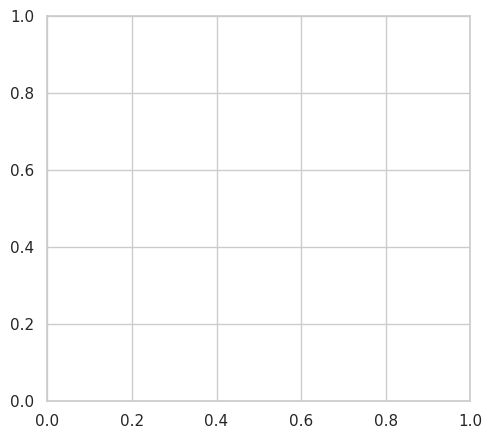

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
train_data = pd.read_csv('Titanic_test.csv')

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# 1. Correlation Matrix
# Select only numeric columns for correlation
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numeric_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# 2. Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Analyze categorical features against survival
# Let's visualize the relationship between 'Pclass', 'Sex', and 'Survived'
plt.figure(figsize=(12, 5))

# Countplot for Pclass vs Survived
plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='Set2')
plt.title('Survival Count by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Countplot for Sex vs Survived
plt.subplot(1, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set3')
plt.title('Survival Count by Sex')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 4. Analyze Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train_data, palette='Set2')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Did not Survive', 'Survived'])
plt.show()

# 5. Analyze Fare Distribution by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=train_data, palette='Set3')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks(ticks=[0, 1], labels=['Did not Survive', 'Survived'])
plt.show()


In [98]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
train_data = pd.read_csv('Titanic_test.csv')

# Display missing values before processing
print("Missing values before handling:")
print(train_data.isnull().sum())

# 1. Handle missing values for Age
# Impute with the median age
median_age = train_data['Age'].median()
train_data['Age'].fillna(median_age, inplace=True)

# 2. Handle missing values for Embarked
# Impute with the mode (most frequent value)
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(mode_embarked, inplace=True)

# 3. Handle missing values for Fare
# Impute with the median fare (if applicable)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# 4. Handle missing values for Cabin
# Option 1: Drop the Cabin column
train_data.drop('Cabin', axis=1, inplace=True)

# Option 2: Impute with a placeholder if you want to keep the column
# train_data['Cabin'].fillna('Unknown', inplace=True)

# Display missing values after processing
print("\nMissing values after handling:")
print(train_data.isnull().sum())

# Now you can proceed with further analysis or modeling


Missing values before handling:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values after handling:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [99]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
train_data = pd.read_csv('Titanic_test.csv')

# Handle missing values as described in previous steps
median_age = train_data['Age'].median()
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Age'].fillna(median_age, inplace=True)
train_data['Embarked'].fillna(mode_embarked, inplace=True)

# Drop Cabin column as it usually has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)

# One-Hot Encoding for 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Label Encoding for 'Sex'
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Display the first few rows of the dataset to verify changes
print(train_data.head())

# Check the updated DataFrame structure
print("\nData types after encoding:")
print(train_data.dtypes)


   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare  Embarked_Q  Embarked_S  
0  34.5      0      0   330911   7.8292        True       False  
1  47.0      1      0   363272   7.0000       False        True  
2  62.0      0      0   240276   9.6875        True       False  
3  27.0      0      0   315154   8.6625       False        True  
4  22.0      1      1  3101298  12.2875       False        True  

Data types after encoding:
PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float6

In [102]:
##model building
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Titanic dataset
train_data = pd.read_csv('Titanic_test.csv')

# Display the first few rows and the columns of the DataFrame
print("Initial DataFrame:")
print(train_data.head())
print("\nColumns in DataFrame:")
print(train_data.columns)

# Handle missing values
median_age = train_data['Age'].median()
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Age'].fillna(median_age, inplace=True)
train_data['Embarked'].fillna(mode_embarked, inplace=True)

# Drop Cabin column as it usually has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)

# One-Hot Encoding for 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Label Encoding for 'Sex'
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Drop unnecessary columns (like 'PassengerId', 'Name', 'Ticket') that won't be used in the model
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Check again for 'Survived' column
if 'Survived' not in train_data.columns:
    print("Error: 'Survived' column not found in the DataFrame.")
else:
    # Define the features (X) and the target variable (y)
    X = train_data.drop('Survived', axis=1)  # Features
    y = train_data['Survived']  # Target

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=200)  # Increase max_iter if needed
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Display the results
    print(f"Accuracy: {accuracy:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


Initial DataFrame:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Columns in DataFrame:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='obj

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Titanic dataset
train_data = pd.read_csv('Titanic_test.csv')

# Display the first few rows and the columns of the DataFrame
print("Initial DataFrame:")
print(train_data.head())
print("\nColumns in DataFrame:")
print(train_data.columns)

# Handle missing values
median_age = train_data['Age'].median()
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Age'].fillna(median_age, inplace=True)
train_data['Embarked'].fillna(mode_embarked, inplace=True)

# Drop Cabin column as it usually has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)

# One-Hot Encoding for 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Label Encoding for 'Sex'
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Drop unnecessary columns (like 'PassengerId', 'Name', 'Ticket') that won't be used in the model
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Check again for 'Survived' column
if 'Survived' not in train_data.columns:
    print("Error: 'Survived' column not found in the DataFrame.")
else:
    # Define the features (X) and the target variable (y)
    X = train_data.drop('Survived', axis=1)  # Features
    y = train_data['Survived']  # Target

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=200)  # Increase max_iter if needed
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Display the results
    print(f"Accuracy: {accuracy:.2f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


Initial DataFrame:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Columns in DataFrame:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='obj

Columns in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Accuracy: 0.81

Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

ROC-AUC Score: 0.88


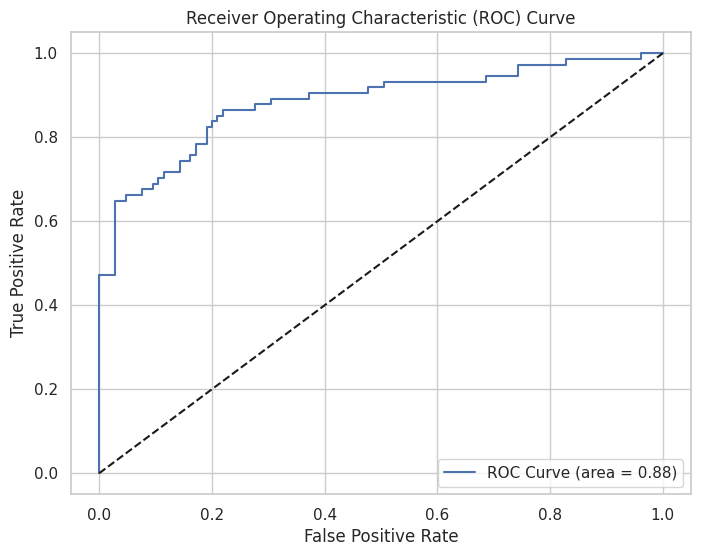

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, auc)
import matplotlib.pyplot as plt

# Load the Titanic training dataset (ensure this file contains the 'Survived' column)
train_data = pd.read_csv('Titanic_train.csv')  # Correct dataset

# Check the columns in the dataset
print("Columns in the dataset:")
print(train_data.columns)

# Handle missing values
median_age = train_data['Age'].median()
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Age'].fillna(median_age, inplace=True)
train_data['Embarked'].fillna(mode_embarked, inplace=True)

# Drop Cabin column as it usually has too many missing values
if 'Cabin' in train_data.columns:
    train_data.drop('Cabin', axis=1, inplace=True)

# One-Hot Encoding for 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Label Encoding for 'Sex'
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Drop unnecessary columns (like 'PassengerId', 'Name', 'Ticket') that won't be used in the model
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Check if 'Survived' is in the dataset before proceeding
if 'Survived' not in train_data.columns:
    raise KeyError("The target column 'Survived' is not found in the dataset.")

# Define the features (X) and the target variable (y)
X = train_data.drop('Survived', axis=1)  # Features
y = train_data['Survived']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Display the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


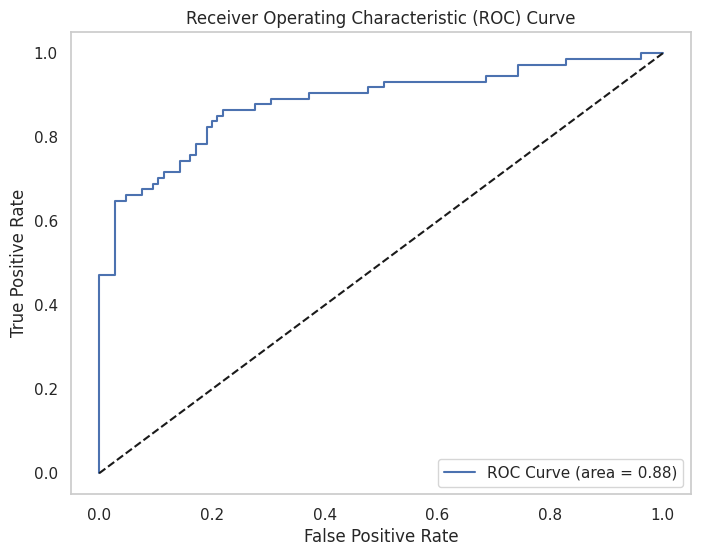

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

# Load the Titanic training dataset
train_data = pd.read_csv('Titanic_train.csv')  # Ensure this file contains the 'Survived' column

# Handle missing values
median_age = train_data['Age'].median()
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Age'].fillna(median_age, inplace=True)
train_data['Embarked'].fillna(mode_embarked, inplace=True)

# Drop Cabin column as it usually has too many missing values
if 'Cabin' in train_data.columns:
    train_data.drop('Cabin', axis=1, inplace=True)

# One-Hot Encoding for 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Label Encoding for 'Sex'
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Drop unnecessary columns (like 'PassengerId', 'Name', 'Ticket') that won't be used in the model
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Define the features (X) and the target variable (y)
X = train_data.drop('Survived', axis=1)  # Features
y = train_data['Survived']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate True Positive Rate and False Positive Rate
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [110]:
##Interview question
##What is the difference between precision and recall?
   ## ans :Precision measures the accuracy of the positive predictions made by the model. It answers the question: Of all the instances that the model predicted as positive, how many were actually positive?
   ## Formula : Precision = True Positive(TP)/ True Positive ( TP) + False Positive ( FP)

    ##Definition: Recall (also known as sensitivity or true positive rate) measures the ability of the model to identify all relevant instances. It answers the question: Of all the actual positive instances, how many did the model correctly identify
       ##  Formula : REcall = Precision = True Positive(TP)/ True Positive ( TP) + False Negative ( FN)



In [111]:
## Cross-validation involves partitioning the data into subsets, training the model on some of these subsets (training set), and validating the model on the remaining subsets (validation set).
## Why is Cross-Validation Important?
## 1.Better Generalization: Cross-validation provides a more accurate estimate of model performance on unseen data compared to a single train-test split. This helps in assessing how well the model will generalize to new data.
## 2.Reduction of Overfitting: By using different subsets of the data for training and validation, cross-validation helps in identifying models that may overfit the training data. If a model performs well on the training set but poorly on the validation sets, it may be overfitting.
## 3.Model Selection: Cross-validation can be used to compare the performance of different models or algorithms. This helps in selecting the best model for a given task.
## 4.Hyperparameter Tuning: When tuning hyperparameters (e.g., learning rate, regularization strength), cross-validation can help in evaluating the effect of different hyperparameter settings on model performance.
##5.Efficient Use of Data: In situations with limited data, cross-validation allows for more efficient use of available data by ensuring that each data point is used for both training and validation